In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

In [2]:
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

C:\Users\the_s\Documents\python_projects\github\glm\glm


In [3]:
import bootstrapped_pred_conf_interval as bpci
import general_linear_model as glm
import prediction_confidence_interval as pci

# 1D Example

In [4]:
beta_actual = np.array([0.5, 2.28901, np.pi])
basis_funcs = ([lambda x:x, np.sin, np.tanh],)

n = 5000
seed = 37
rng = np.random.default_rng(seed)
X = rng.uniform(low=-10, high=10, size=n).reshape((-1,1))
y_noise = 20 * (2 * rng.uniform(size=X.shape[0]) - 1)
y = glm.GLM.func_glm(
    basis_funcs,
    beta_actual,
    X
) + y_noise

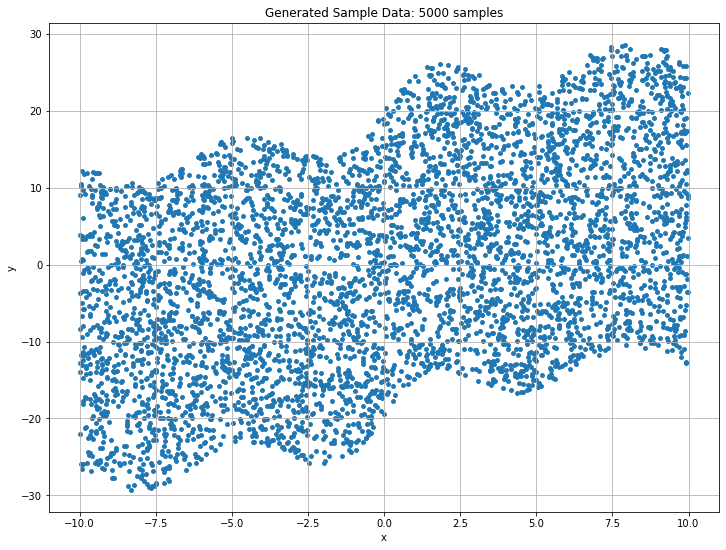

In [5]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.scatter(X[:, 0], y, s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Generated Sample Data: {n} samples')
plt.show()

In [6]:
model = glm.GLM(basis_funcs=basis_funcs)
model.fit(X, y, sample_weights=None)

In [7]:
n2 = 1000
x_fit = np.linspace(-10, 10, n2).reshape(-1, 1)
y_fit = model.predict(x_fit)

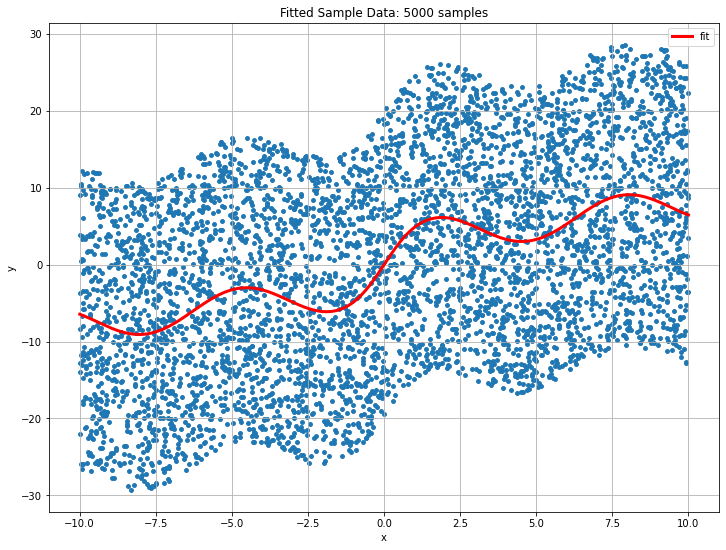

In [8]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.scatter(X[:, 0], y, s=15)
plt.plot(x_fit[:, 0], y_fit, lw=3, color='red', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data: {n} samples')
plt.legend()
plt.show()

In [9]:
print(
    f'{model.dof} -- degrees of freedom\n'
    f'{model.sigma_sqrd} -- sigma squared\n'
    f'{model.beta} -- optimal beta\n'
    f'{model.var_beta}\n -- variance of beta\n'
)

4997.0 -- degrees of freedom
130.9128056278399 -- sigma squared
[0.44528092 2.29691659 3.24730658] -- optimal beta
[[ 0.00440438  0.00059528 -0.02413875]
 [ 0.00059528  0.05751328 -0.01227075]
 [-0.02413875 -0.01227075  0.1627844 ]]
 -- variance of beta



In [10]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)

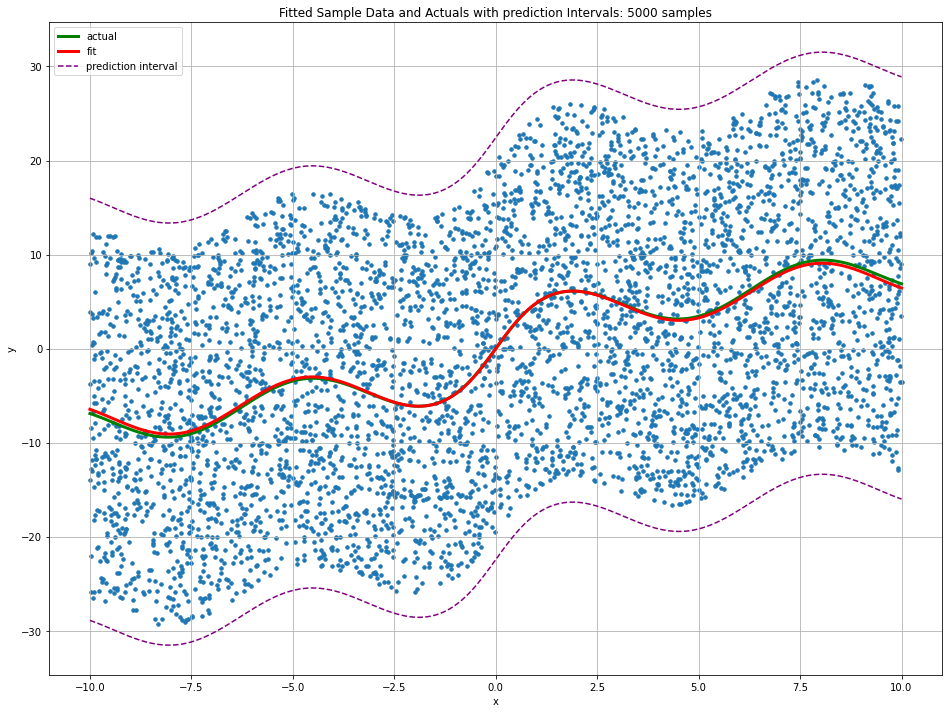

In [11]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(model.basis_funcs, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()

In [12]:
interval_type = 'confidence'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)

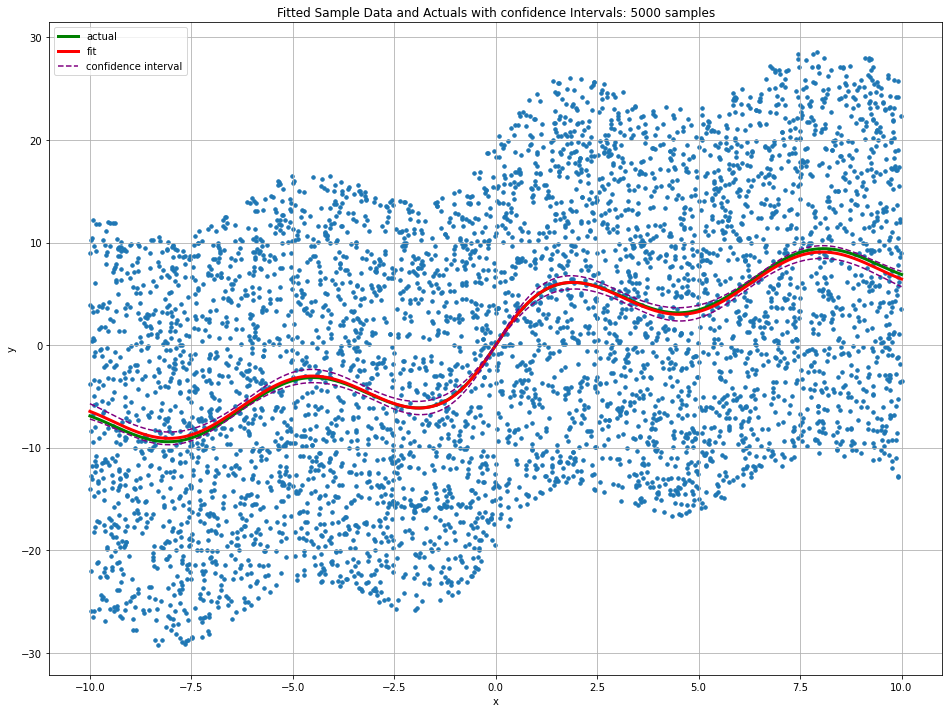

In [13]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(model.basis_funcs, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()

In [14]:
interval_type = 'prediction'

var_f_bs, pred_conf_interval_bs = bpci.bootstrap_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None,
    nbootstraps=50,
    resample_frac=0.7
)

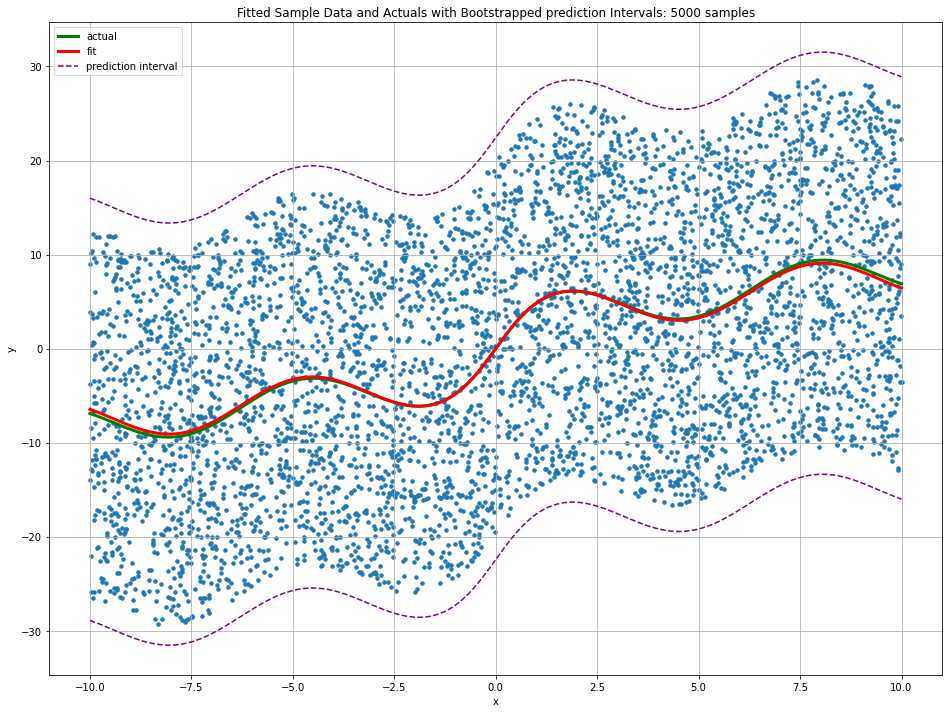

In [15]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(model.basis_funcs, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval_bs, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval_bs, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with Bootstrapped {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()

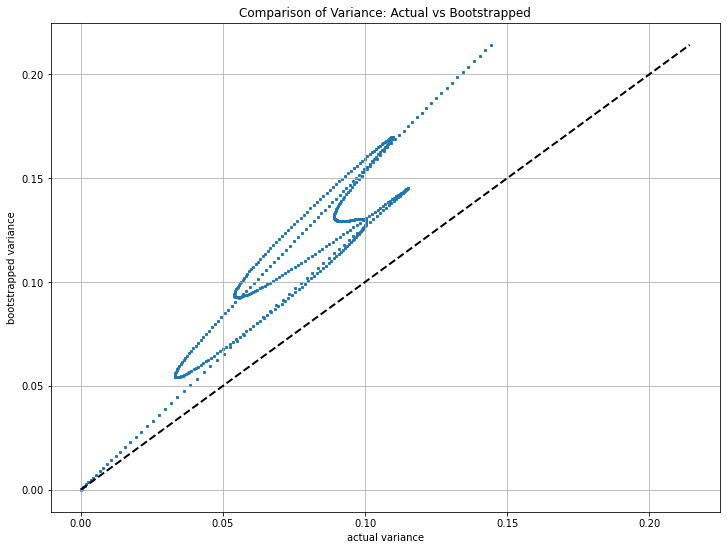

In [16]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.scatter(var_f, var_f_bs, s=4)
plt.plot(
    np.linspace(0, max(var_f.max(), var_f_bs.max()), 10),
    np.linspace(0, max(var_f.max(), var_f_bs.max()), 10),
    linestyle='--',
    color='black',
    lw=2
  )
plt.xlabel('actual variance')
plt.ylabel('bootstrapped variance')
plt.title('Comparison of Variance: Actual vs Bootstrapped')
plt.show()

# 3D Example

In [17]:
beta_actual = np.array([0.5, 2.28901, np.pi, -1.5])
basis_funcs = ([lambda x:x, np.sin, np.tanh], [lambda y: y**2])

In [18]:
n = 1000
X = np.concatenate(
    [rng.uniform(low=-10, high=10, size=n).reshape(-1,1)
     for i in range(len(basis_funcs))],
    axis=1
)
y_noise = 20 * (2 * rng.uniform(size=X.shape[0]) - 1)
y = glm.GLM.func_glm(basis_funcs, beta_actual, X) + y_noise

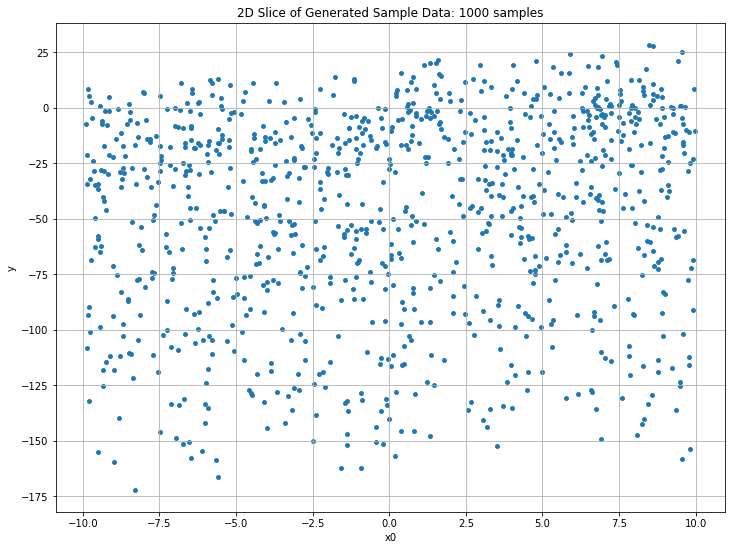

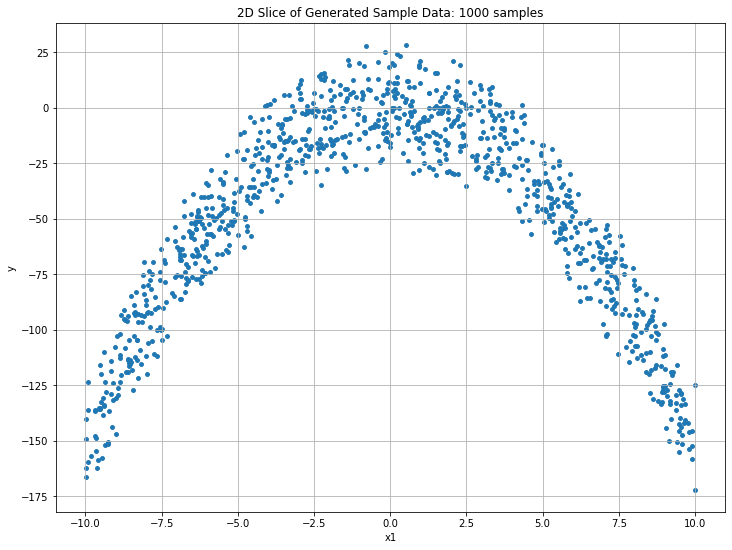

In [19]:
for i in range(len(basis_funcs)):
    plt.figure(figsize=(12, 9))
    plt.grid()
    plt.scatter(X[:, i], y, s=15)
    plt.xlabel(f'x{i}')
    plt.ylabel('y')
    plt.title(f'2D Slice of Generated Sample Data: {n} samples')
    plt.show()
    del i

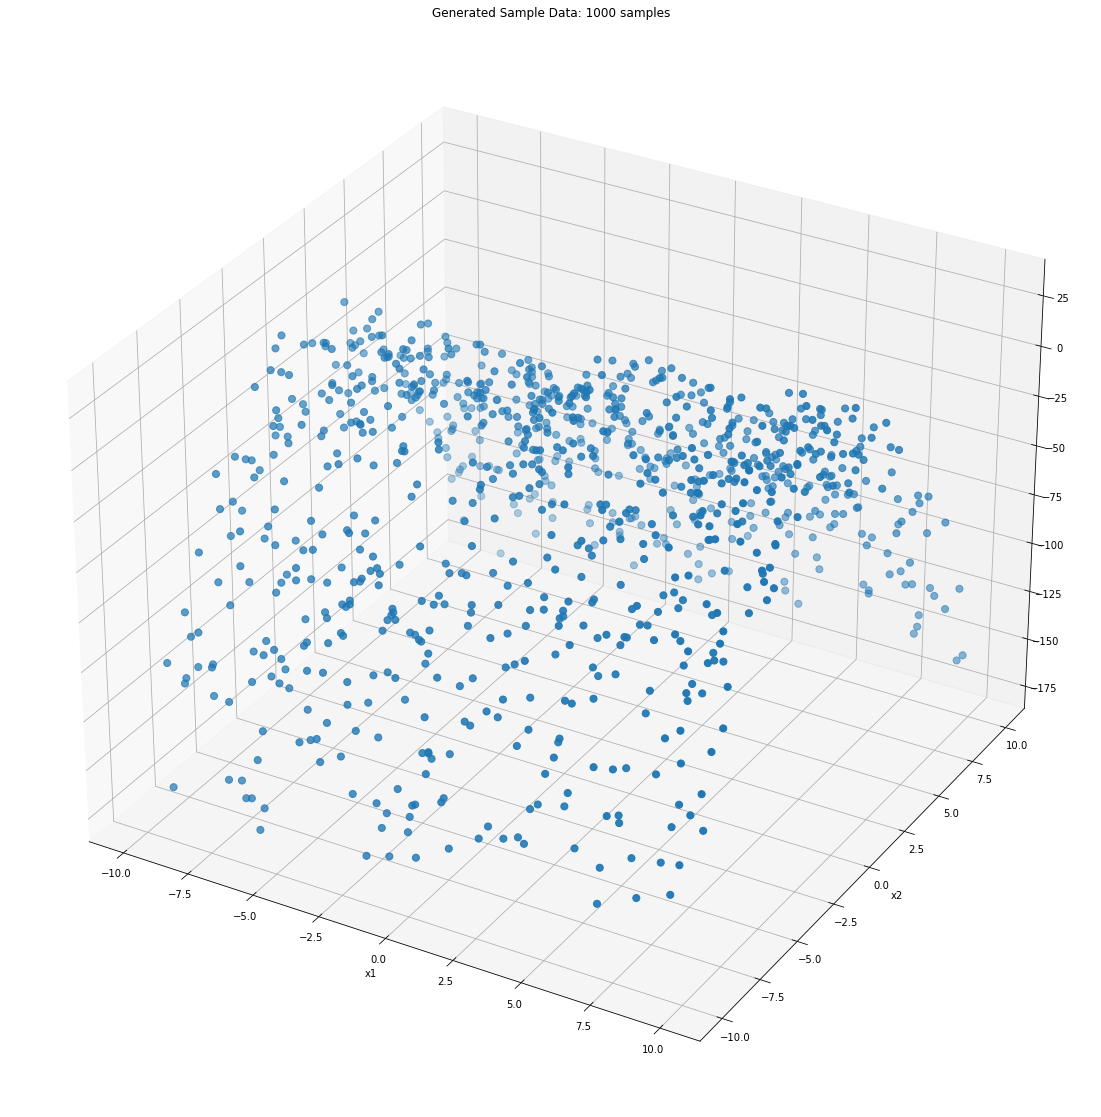

In [20]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Generated Sample Data: {n} samples')
plt.show()
del ax, fig

In [21]:
model = glm.GLM(basis_funcs=basis_funcs)
model.fit(X, y, sample_weights=None)

In [22]:
n2 = 1000
x_fit =  np.concatenate(
    [np.linspace(-10, 10, n2).reshape(-1, 1)
     for i in range(len(basis_funcs))],
    axis=1
)
y_fit = model.predict(x_fit)

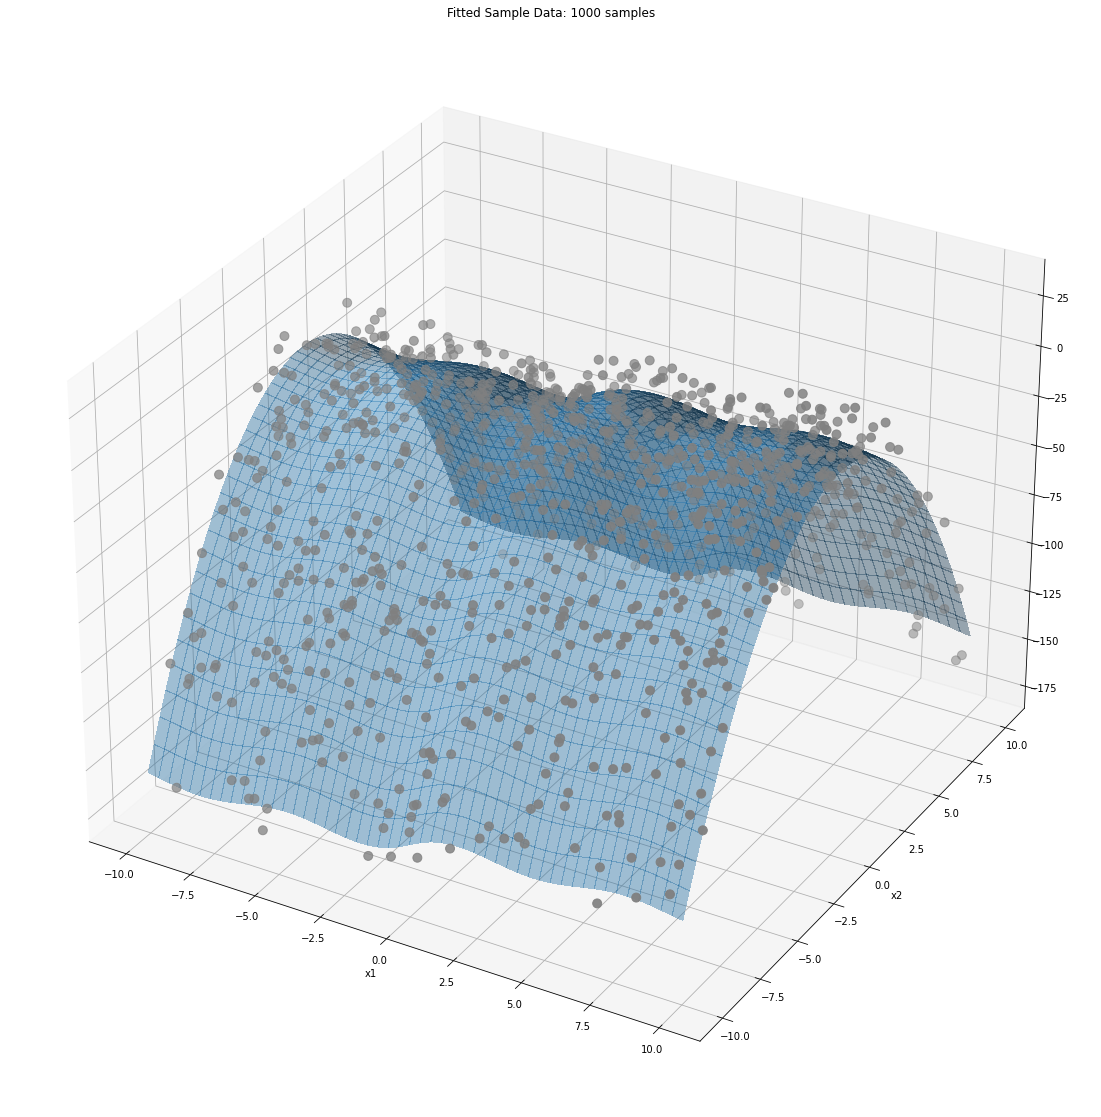

In [23]:
xx1, xx2 = np.meshgrid(x_fit[:, 0], x_fit[:, 1])
xx = np.concatenate(
    [xx1.reshape(*xx1.shape, 1), xx2.reshape(*xx1.shape, 1)],
    axis=2
).reshape(xx1.shape[0] * xx1.shape[1], 2)
yy = model.predict(xx).reshape(*xx1.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
ax.scatter(X[:, 0], X[:, 1], y, s=80, color='grey')
surf = ax.plot_surface(
    xx1,
    xx2,
    yy,
    linewidth=0, 
    antialiased=False,
    alpha=0.4
)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Fitted Sample Data: {n} samples')
plt.show()
del fig, ax, surf

In [24]:
print(
    f'{model.dof} -- degrees of freedom\n'
    f'{model.sigma_sqrd} -- sigma squared\n'
    f'{model.beta} -- optimal beta\n'
    f'{model.var_beta}\n -- variance of beta\n'
)

996.0 -- degrees of freedom
131.23148929559906 -- sigma squared
[ 0.2750267   2.50280659  4.2956439  -1.49729076] -- optimal beta
[[ 2.26039302e-02  9.89156164e-04 -1.25717918e-01 -6.13963510e-05]
 [ 9.89156164e-04  3.02220311e-01 -5.61170800e-02 -1.23155081e-05]
 [-1.25717918e-01 -5.61170800e-02  8.55329596e-01  3.15812964e-04]
 [-6.13963510e-05 -1.23155081e-05  3.15812964e-04  7.00888992e-05]]
 -- variance of beta



In [25]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)
print(pred_conf_interval.shape)

(1000,)


[0.5        2.28901    3.14159265]


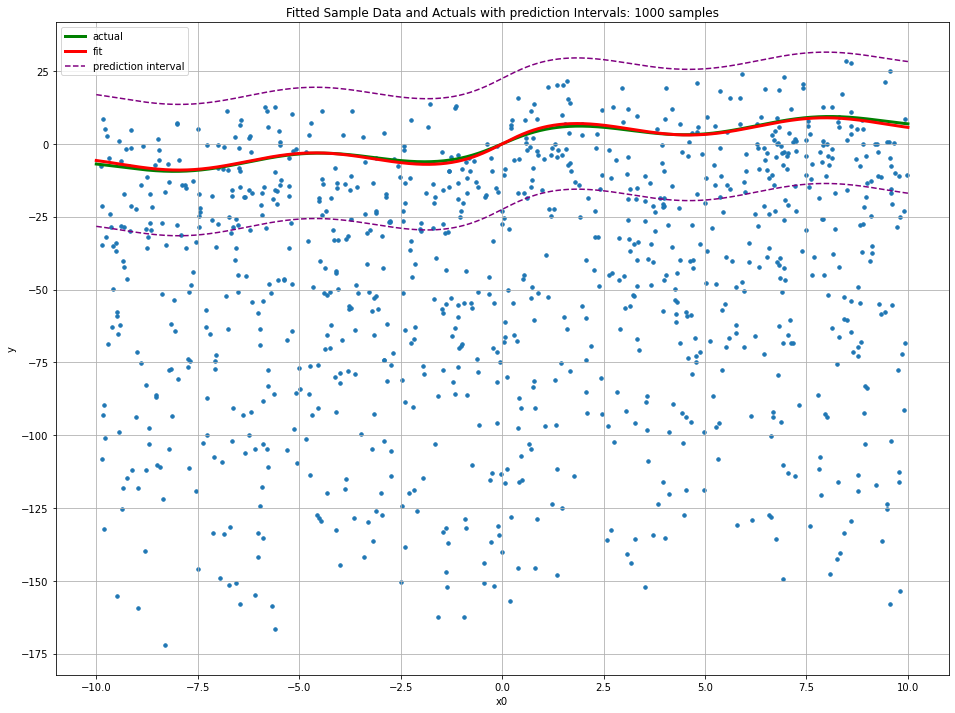

[-1.5]


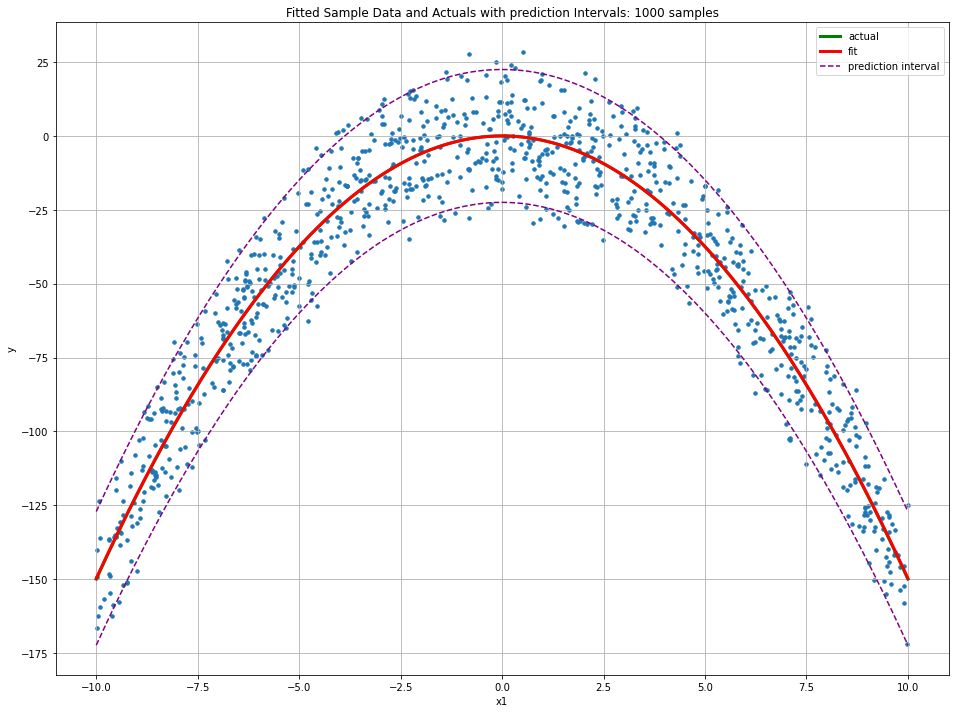

In [26]:
prev_mbfs_len = 0
for i in range(len(basis_funcs)):
    mbfs = model.basis_funcs[i]
    ba = beta_actual[prev_mbfs_len:prev_mbfs_len + len(mbfs)]
    mba = model.beta[prev_mbfs_len:prev_mbfs_len + len(mbfs)]
    print(ba)
    plt.figure(figsize=(16, 12))
    plt.grid()
    plt.scatter(X[:, i], y, s=12)
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), ba, x_fit[:, i].reshape(-1,1)),
        lw=3,
        color='green',
        label='actual'
    )
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), mba, x_fit[:, i].reshape(-1,1)),
        lw=3,
        color='red',
        label='fit'
    )
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), mba, x_fit[:, i].reshape(-1,1)) - pred_conf_interval,
        color='purple',
        linestyle='--',
        label=f'{interval_type} interval'
    )
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), mba, x_fit[:, i].reshape(-1,1)) + pred_conf_interval,
        color='purple',
        linestyle='--'
    )
    plt.xlabel(f'x{i}')
    plt.ylabel('y')
    plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
    plt.legend()
    plt.show()
    
    prev_mbfs_len = len(mbfs)
    del i, mbfs, ba
del prev_mbfs_len

In [27]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=xx,
    interval_type=interval_type, 
    significance_level=None
)
print(pred_conf_interval.shape)

(1000000,)


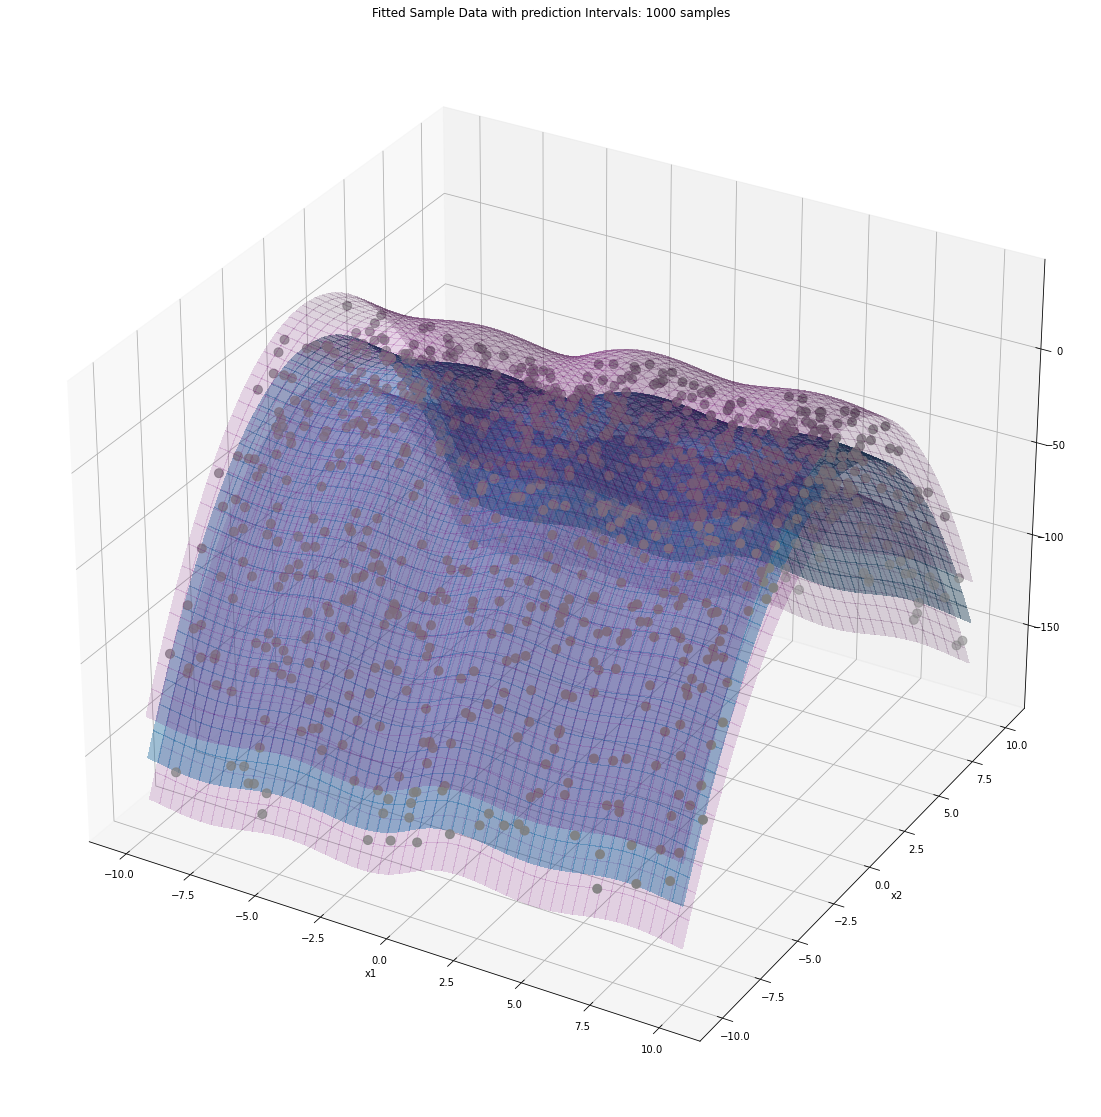

In [28]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
ax.scatter(X[:, 0], X[:, 1], y, s=80, color='grey')
surf = ax.plot_surface(
    xx1,
    xx2,
    yy,
    linewidth=0, 
    antialiased=False,
    alpha=0.4
)
surf = ax.plot_surface(
    xx1,
    xx2,
    yy - pred_conf_interval.reshape(yy.shape),
    linewidth=0, 
    antialiased=False,
    alpha=0.15,
    color='purple'
)
surf = ax.plot_surface(
    xx1,
    xx2,
    yy + pred_conf_interval.reshape(yy.shape),
    linewidth=0, 
    antialiased=False,
    alpha=0.15,
    color='purple'
)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Fitted Sample Data with {interval_type} Intervals: {n} samples')
plt.show()
del fig, ax, surf

# Example Using Non Ideal Basis Functions

In [29]:
beta_actual = np.array([0.5, 2.28901, np.pi])
basis_funcs_actual = ([lambda x:x, np.sin, np.tanh],)

n = 5000
rng = np.random.default_rng(seed)
X = rng.uniform(low=-10, high=10, size=n).reshape((-1,1))
y_noise = 20 * (2 * rng.uniform(size=X.shape[0]) - 1)
y = glm.GLM.func_glm(
    basis_funcs_actual,
    beta_actual,
    X
) + y_noise

In [30]:
basis_funcs = ([lambda x:x, np.sin, np.cos, np.exp, lambda x: np.exp(-x), lambda x: 1 / (1 + np.exp(-x))],)

model = glm.GLM(basis_funcs=basis_funcs)
model.fit(X, y, sample_weights=None)

In [31]:
print(
    f'{model.dof} -- degrees of freedom\n'
    f'{model.sigma_sqrd} -- sigma squared\n'
    f'{model.beta} -- optimal beta\n'
    f'{model.var_beta}\n -- variance of beta\n'
)

4994.0 -- degrees of freedom
132.23850740514828 -- sigma squared
[ 9.35345815e-01  2.52350112e+00 -2.56014666e-02 -1.32730853e-04
  1.11789874e-04  8.65350165e-01] -- optimal beta
[[ 2.61688339e-03 -1.88741376e-03  9.56646389e-04 -1.01344867e-06
   2.19085163e-06 -1.12129102e-02]
 [-1.88741376e-03  5.74649700e-02  1.06304872e-03  7.61163237e-07
  -6.64603635e-07  2.98865959e-03]
 [ 9.56646389e-04  1.06304872e-03  6.25362198e-02  4.06132109e-06
   4.66985842e-06 -1.08704145e-02]
 [-1.01344867e-06  7.61163237e-07  4.06132109e-06  3.33077924e-09
  -5.73814686e-10 -2.53758091e-06]
 [ 2.19085163e-06 -6.64603635e-07  4.66985842e-06 -5.73814686e-10
   4.44189454e-09 -9.88252580e-06]
 [-1.12129102e-02  2.98865959e-03 -1.08704145e-02 -2.53758091e-06
  -9.88252580e-06  1.22458822e-01]]
 -- variance of beta



In [32]:
n2 = 1000
x_fit = np.linspace(-10, 10, n2).reshape(-1, 1)
y_fit = model.predict(x_fit)

In [33]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)

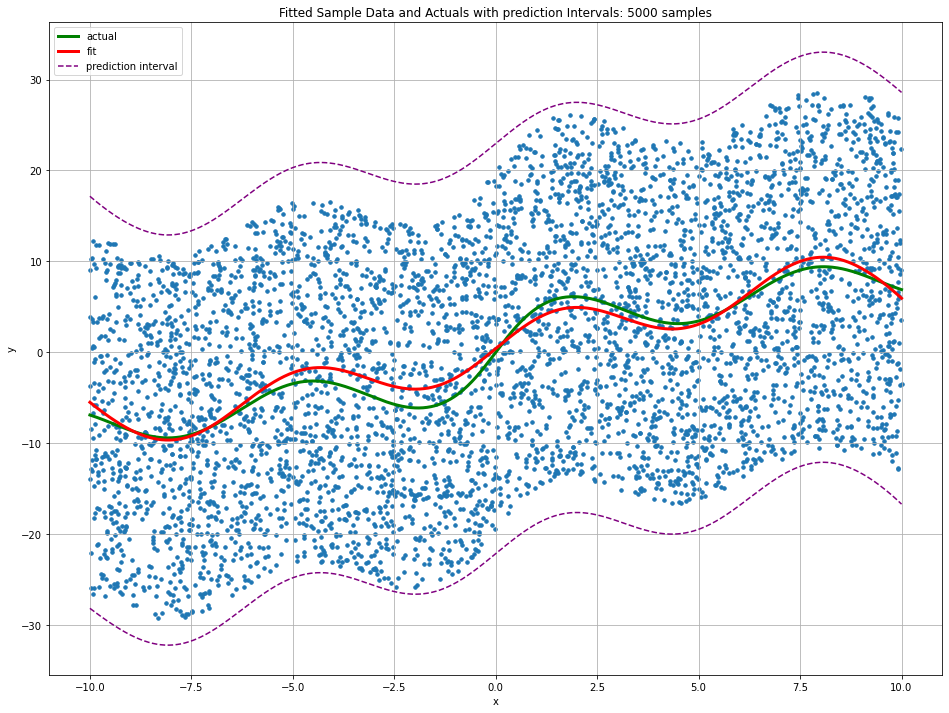

In [34]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(basis_funcs_actual, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()